<a href="https://colab.research.google.com/github/WNderitu/Malaria-Parasite-Detector-Showcase/blob/main/1_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plasmodium Vivax (malaria) parasite detector and counter**

**Notebook 1: Data Preparation Notebook**

- YOLOv8n model variant/size

In [ ]:
from google.colab import drive

# Mount Google Drive
try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!


## **1.0 Install & import required libraries**

In [ ]:
!pip install matplotlib --quiet

In [ ]:
!pip install Pillow --quiet #installing PILLOW LIBRARY

In [ ]:
!pip install imagehash --quiet

In [ ]:
!pip install pyyaml --quiet

In [ ]:
import requests
import os
import json
import random
import shutil # For copying images, creating directories
from PIL import Image # Import Image to get image dimensions
from pprint import pprint # for
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt # Import pyplot to plot images
import hashlib # find identical images
from collections import defaultdict
import numpy as np
import math # for mathematical calculations
import yaml # For generating data.yaml
from collections import Counter # Import Counter to get class counts
import pandas as pd
import matplotlib.patches as mpatches

## **1.1 Loading & inspecting Dataset**

Dataset sourced from: https://bbbc.broadinstitute.org/BBBC041/

Dataset consists of an image folder, training json file and test json file

1,328 microscopic images of blood smears of jpg or png format

Resolution:1600x1200

In [ ]:
import requests
import zipfile
import os

# URL of the dataset
dataset_url = "https://data.broadinstitute.org/bbbc/BBBC041/malaria.zip"

extract_dir_drive = '/content/drive/MyDrive/malaria_dataset'

# Create the directory if it doesn't exist
os.makedirs(extract_dir_drive, exist_ok=True)

# Define the path for the downloaded zip file
zip_file_path = os.path.join(extract_dir_drive, "BBBC041_v1_images.zip")

print(f"Downloading dataset from {dataset_url} to {zip_file_path}...")

try:
    # Download the file
    response = requests.get(dataset_url, stream=True)
    response.raise_for_status() # Raise an exception for HTTP errors

    with open(zip_file_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download complete.")

    # Extract the contents
    print(f"Extracting contents to {extract_dir_drive}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir_drive)
    print("Extraction complete.")

    # Clean up: remove the downloaded zip file
    os.remove(zip_file_path)
    print(f"Removed downloaded zip file: {zip_file_path}")

    # List the extracted contents to verify
    print("\nExtracted contents:")
    extracted_contents = os.listdir(extract_dir_drive)
    pprint(extracted_contents)

except requests.exceptions.RequestException as e:
    print(f"Error during download: {e}")
except zipfile.BadZipFile:
    print(f"Error: The downloaded file is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Download complete.
Extracting contents to /content/drive/MyDrive/malaria_dataset...
Extraction complete.
Removed downloaded zip file: /content/drive/MyDrive/malaria_dataset/BBBC041_v1_images.zip

Extracted contents:
['malaria', '__MACOSX']


In [ ]:
import os
from pprint import pprint

malaria_subfolder_path = os.path.join(extract_dir_drive, 'malaria')

if os.path.exists(malaria_subfolder_path):
    print(f"Contents of '{malaria_subfolder_path}':")
    pprint(os.listdir(malaria_subfolder_path))
else:
    print(f"Error: The folder '{malaria_subfolder_path}' does not exist.")

Contents of '/content/drive/MyDrive/malaria_dataset/malaria':
['images',
 'test.json',
 'training.json',
 'red_blood_cell_only_images',
 'red_blood_cell_only.json']


In [ ]:
# Define paths to test & training json files
training_json = os.path.join(malaria_subfolder_path, 'training.json')
test_json = os.path.join(malaria_subfolder_path, 'test.json')

# Check if both files exist
if os.path.exists(training_json) and os.path.exists(test_json):
    print(f"Training JSON file found at: {training_json}")
    print(f"Testing JSON file found at: {test_json}")

Training JSON file found at: /content/drive/MyDrive/malaria_dataset/malaria/training.json
Testing JSON file found at: /content/drive/MyDrive/malaria_dataset/malaria/test.json


In [ ]:
# Define path to image subfolder
img_dir = os.path.join(malaria_subfolder_path, 'images')

# Check if image subfolder exists
if os.path.exists(img_dir):
    print(f"Image subfolder found at: {img_dir}")

Image subfolder found at: /content/drive/MyDrive/malaria_dataset/malaria/images


In [ ]:
# Check if all training images have corresponding image names in training.json files
with open(training_json, 'r') as f:
    training_data = json.load(f)
    training_images = [os.path.basename(item["image"]["pathname"]) for item in training_data]
    missing_train = [img for img in training_images if img not in os.listdir(img_dir)]
    print(f"\nNumber of images listed in training.json: {len(training_images)}")


Number of images listed in training.json: 1031


In [ ]:
# Check if all test images have corresponding image names in test.json files
with open(test_json, 'r') as f:
    test_data = json.load(f)
    test_images = [os.path.basename(item["image"]["pathname"]) for item in test_data]
    missing_train = [img for img in test_images if img not in os.listdir(img_dir)]
    print(f"\nNumber of Images listed in test.json: {len(test_images)}")


Number of Images listed in test.json: 120


In [ ]:
# collect category names from train images
all_categories = []
for img_data in training_data:
    for obj in img_data["objects"]:
        all
        all_categories.append(obj["category"])
        unique_categories = sorted(set(all_categories))

print("Unique labels found in training dataset:", unique_categories)

# number of categories
print(f"Number of categories: {len(unique_categories)}")

Unique labels found in training dataset: ['difficult', 'gametocyte', 'leukocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite']
Number of categories: 7


In [ ]:
# collect category names from test images
all_categories = []
for img_data in test_data:
    for obj in img_data["objects"]:
        all
        all_categories.append(obj["category"])
        unique_categories = sorted(set(all_categories))

print("Unique labels found in test dataset:", unique_categories)

# number of categories
print(f"Number of categories: {len(unique_categories)}")

Unique labels found in test dataset: ['difficult', 'gametocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite']
Number of categories: 6


## 1.2 Class Imbalance

### *1.2.1 Visualize class imbalance*



*   Class imbalance is inherently expected as a sample of human blood contains alot of red blood cells that are uninfected in comparison to red blood cells infected by the malaria parasite.


TRAINING set:
difficult: 441 (0.55%)
gametocyte: 144 (0.18%)
leukocyte: 103 (0.13%)
red blood cell: 77420 (96.64%)
ring: 353 (0.44%)
schizont: 179 (0.22%)
trophozoite: 1473 (1.84%)

 TEST set:
difficult: 5 (0.08%)
gametocyte: 12 (0.20%)
leukocyte: 0 (0.00%)
red blood cell: 5614 (94.80%)
ring: 169 (2.85%)
schizont: 11 (0.19%)
trophozoite: 111 (1.87%)


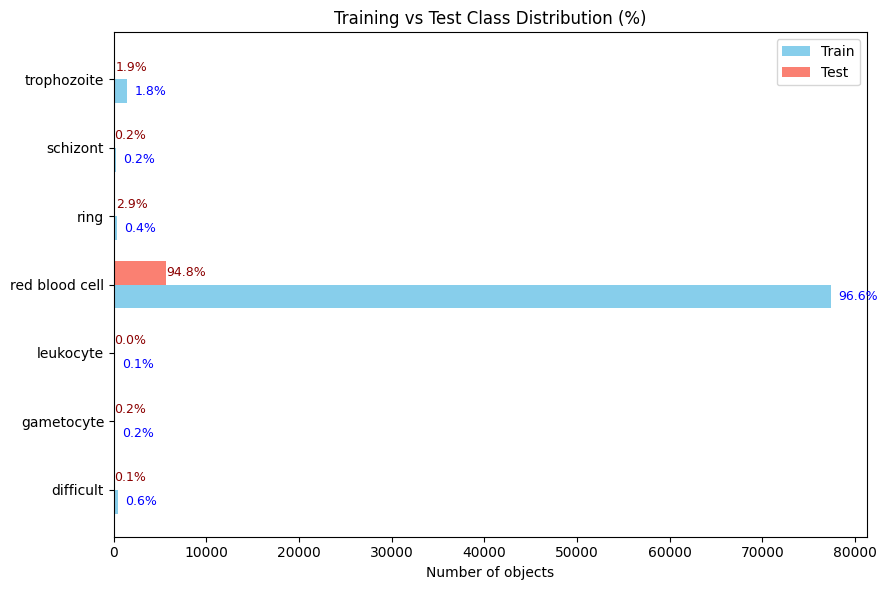

In [ ]:
# Check class imbalance and visualize

# function to load class counts from a JSON file
def get_class_counts(json_path):
    with open(json_path) as f:
        data = json.load(f)
    categories = []
    for item in data:
        # Ensure 'objects' key exists and is iterable
        if 'objects' in item and isinstance(item['objects'], list):
            for obj in item["objects"]:
                if 'category' in obj:
                    categories.append(obj["category"])
    counts = Counter(categories)
    total = sum(counts.values())
    percentages = {cls: (count / total) * 100 for cls, count in counts.items()}
    return counts, percentages

# Load train and test sets ---
train_counts, train_perc = get_class_counts(training_json)
test_counts, test_perc = get_class_counts(test_json)

# Ensure consistent class order
all_classes = sorted(set(train_counts.keys()) | set(test_counts.keys()))

# Prepare data
train_vals = [train_counts.get(c, 0) for c in all_classes]
test_vals = [test_counts.get(c, 0) for c in all_classes]
train_pct = [train_perc.get(c, 0) for c in all_classes]
test_pct = [test_perc.get(c, 0) for c in all_classes]

# Print summary
print("TRAINING set:")
for c in all_classes:
    print(f"{c}: {train_counts.get(c, 0)} ({train_perc.get(c, 0):.2f}%)")
print("\n TEST set:")
for c in all_classes:
    print(f"{c}: {test_counts.get(c, 0)} ({test_perc.get(c, 0):.2f}%)")

# Plot side by side horizontal bars
y = np.arange(len(all_classes))
bar_height = 0.35

plt.figure(figsize=(9, 6))
plt.barh(y - bar_height/2, train_vals, height=bar_height, color='skyblue', label='Train')
plt.barh(y + bar_height/2, test_vals, height=bar_height, color='salmon', label='Test')

# Add percentage labels to the right
for i, c in enumerate(all_classes):
    plt.text(train_vals[i] + max(train_vals)*0.01, y[i] - bar_height/2,
             f"{train_pct[i]:.1f}%", va='center', fontsize=9, color='blue')
    plt.text(test_vals[i] + max(test_vals)*0.01, y[i] + bar_height/2,
             f"{test_pct[i]:.1f}%", va='center', fontsize=9, color='darkred')

plt.yticks(y, all_classes)
plt.xlabel("Number of objects")
plt.title("Training vs Test Class Distribution (%)")
plt.legend()
plt.tight_layout()
plt.show()

### *1.2.2 Selecting training images with only rbc annotations*

*   In the 1328 images, the majority class (type of blood cell) is red blood cells
*   Identify all images that contain only red blood cell annotations and remove the images for both test and training image sets



In [ ]:
# Define path to image subfolder
img_dir = os.path.join(malaria_subfolder_path, 'images')

# Filter training images that contain only 'red blood cell' annotations
red_blood_cell_only_images = []
if training_data:
    for entry in training_data:
        categories_in_image = set()
        for obj in entry.get('objects', []):
            categories_in_image.add(obj['category'])

        # Check if the image contains only 'red blood cell' and has at least one object
        if 'red blood cell' in categories_in_image and len(categories_in_image) == 1 and len(entry.get('objects', [])) > 0:
            red_blood_cell_only_images.append(entry)

    print(f"Found {len(red_blood_cell_only_images)} images with only red blood cell annotations.")

    # Select a few random entries from the filtered list
    num_images_to_display = 2 # You can adjust this number
    if len(red_blood_cell_only_images) >= num_images_to_display:
        sample_entries = random.sample(red_blood_cell_only_images, num_images_to_display)
    else:
        sample_entries = red_blood_cell_only_images
        num_images_to_display = len(sample_entries)


    if sample_entries:
        plt.figure(figsize=(10, 10 * num_images_to_display)) # Adjust figure size for vertical layout

        for i, entry in enumerate(sample_entries):
            # Extract the image filename from the pathname
            image_pathname = os.path.basename(entry['image']['pathname'])
            # Construct the full image path by joining the base directory and the filename
            image_path = os.path.join(img_dir, image_pathname)


            try:
                img = Image.open(image_path).convert("RGB") # Convert to RGB
                draw = ImageDraw.Draw(img)

                # Draw bounding boxes and labels
                for obj in entry['objects']:
                    bbox = obj['bounding_box']
                    category = obj['category']
                    x_min = bbox['minimum']['c']
                    y_min = bbox['minimum']['r']
                    x_max = bbox['maximum']['c']
                    y_max = bbox['maximum']['r']

                    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=3)

                    text_color = "black"
                    box_color = "yellow"
                    try:
                        font = ImageFont.truetype("arial.ttf", 20)
                    except IOError:
                        font = ImageFont.load_default()

                    text_bbox = draw.textbbox((x_min, y_min), category, font=font)
                    text_width = text_bbox[2] - text_bbox[0]
                    text_height = text_bbox[3] - text_bbox[1]

                    text_box_coords = [(x_min, y_min - text_height), (x_min + text_width, y_min)]
                    text_box_coords[0] = (max(0, text_box_coords[0][0]), max(0, text_box_coords[0][1]))
                    text_box_coords[1] = (min(img.width, text_box_coords[1][0]), min(img.height, text_box_coords[1][1]))


                    draw.rectangle(text_box_coords, fill=box_color)
                    text_position = (text_box_coords[0][0], text_box_coords[0][1])
                    draw.text(text_position, category, fill=text_color, font=font)


                plt.subplot(num_images_to_display, 1, i + 1)
                plt.imshow(img)
                plt.title(f"Image with Only Red Blood Cell Annotations {i+1}")
                plt.axis('off')

            except FileNotFoundError:
                print(f"Error: Image file not found at {image_path}")
            except Exception as e:
                print(f"An error occurred while processing image {image_path}: {e}")

        plt.tight_layout()
        plt.show()

    else:
        print("No images found with only red blood cell annotations.")

else:
    print("No training data available to filter images.")

Found 177 images with only red blood cell annotations.
Error: Image file not found at /content/drive/MyDrive/malaria_dataset/malaria/images/ee57e743-a876-4f69-9fe5-bf5d01b44689.png
Error: Image file not found at /content/drive/MyDrive/malaria_dataset/malaria/images/e2e68cb3-0588-40bb-95b4-356f9cacffc3.png


<Figure size 1000x2000 with 0 Axes>

### *1.2.3 Move images with only red blood cell annotations to a separate folder*

In [ ]:
# Define paths
original_images_dir = os.path.join(malaria_subfolder_path, 'images')
r_b_c_only_output_dir = os.path.join(malaria_subfolder_path, 'red_blood_cell_only_images')

# Create the output directory if it doesn't exist
os.makedirs(r_b_c_only_output_dir, exist_ok=True)

print(f"Created directory for 'red blood cell only' images: {r_b_c_only_output_dir}")

moved_count = 0
if 'red_blood_cell_only_images' in locals() and red_blood_cell_only_images:
    print(f"Moving {len(red_blood_cell_only_images)} images to the new folder...")
    for entry in red_blood_cell_only_images:
        image_pathname = os.path.basename(entry['image']['pathname'])
        source_path = os.path.join(original_images_dir, image_pathname)
        destination_path = os.path.join(r_b_c_only_output_dir, image_pathname)

        if os.path.exists(source_path):
            try:
                shutil.move(source_path, destination_path)
                moved_count += 1
            except Exception as e:
                print(f"Error moving {image_pathname}: {e}")
        else:
            print(f"Warning: Source image not found (already moved or missing): {source_path}")
    print(f"Successfully moved {moved_count} images containing only red blood cell annotations.\n")
else:
    print("No images identified as containing only red blood cell annotations, or the list was not generated.")

print(f"Total images originally in: {original_images_dir}")
print(f"Total images now in: {r_b_c_only_output_dir}")
# print new number of remaining images in original image subfolder
print(f"Total images remaining in original image subfolder: {len(os.listdir(original_images_dir))}")


Created directory for 'red blood cell only' images: /content/drive/MyDrive/malaria_dataset/malaria/red_blood_cell_only_images
Moving 177 images to the new folder...
Successfully moved 0 images containing only red blood cell annotations.

Total images originally in: /content/drive/MyDrive/malaria_dataset/malaria/images
Total images now in: /content/drive/MyDrive/malaria_dataset/malaria/red_blood_cell_only_images
Total images remaining in original image subfolder: 1151


### *1.2.4 Create JSON file*

In [ ]:
# Define the path where the new JSON file will be saved
# malaria_subfolder_path is defined as '/content/drive/MyDrive/malaria_dataset/malaria'
output_json_path = os.path.join(malaria_subfolder_path, 'red_blood_cell_only.json')

# Ensure red_blood_cell_only_images list is available and not empty
if 'red_blood_cell_only_images' in locals() and red_blood_cell_only_images:
    print(f"Creating JSON file for {len(red_blood_cell_only_images)} images with only red blood cell annotations...")
    with open(output_json_path, 'w') as f:
        json.dump(red_blood_cell_only_images, f, indent=4)
    print(f"Successfully created: {output_json_path}")
else:
    print("The list 'red_blood_cell_only_images' is not available or is empty. Please ensure the previous cells for identifying and filtering these images were run successfully.")


Creating JSON file for 177 images with only red blood cell annotations...
Successfully created: /content/drive/MyDrive/malaria_dataset/malaria/red_blood_cell_only.json


### *1.2.5 Confirm categories in images with only red blood cells*

In [ ]:
# Assuming red_blood_cell_only_images is available from previous execution
if 'red_blood_cell_only_images' in locals() and red_blood_cell_only_images:
    all_categories_in_rbc_only = set()
    for entry in red_blood_cell_only_images:
        for obj in entry.get('objects', []):
            all_categories_in_rbc_only.add(obj['category'])

    print(f"Unique categories found in images with only red blood cell annotations: {sorted(list(all_categories_in_rbc_only))}")
else:
    print("The list 'red_blood_cell_only_images' is not available or is empty. Please ensure the previous cell for identifying these images was run successfully.")


Unique categories found in images with only red blood cell annotations: ['red blood cell']


### *1.2.6 Confirm class distribution after moving images with only red blood cell annotations from image subfolder*

Original training images: 1208
Training images with only RBC moved: 177
Training images remaining for analysis (updated training_data): 1031

TRAINING set (excluding red blood cell only images):
difficult: 441 (0.64%)
gametocyte: 144 (0.21%)
leukocyte: 103 (0.15%)
red blood cell: 65721 (96.06%)
ring: 353 (0.52%)
schizont: 179 (0.26%)
trophozoite: 1473 (2.15%)

TEST set:
difficult: 5 (0.08%)
gametocyte: 12 (0.20%)
leukocyte: 0 (0.00%)
red blood cell: 5614 (94.80%)
ring: 169 (2.85%)
schizont: 11 (0.19%)
trophozoite: 111 (1.87%)


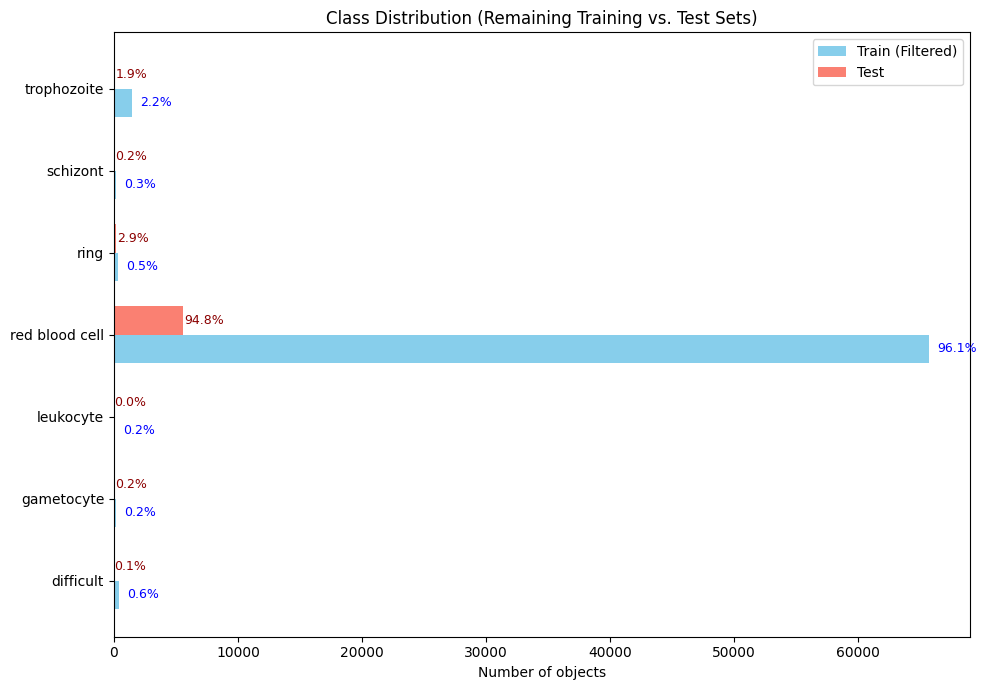

In [ ]:
# Helper function to get class counts from a list of image data
def get_class_counts_from_data_list(data_list):
    categories = []
    for item in data_list:
        if 'objects' in item and isinstance(item['objects'], list):
            for obj in item["objects"]:
                if 'category' in obj:
                    categories.append(obj["category"])
    counts = Counter(categories)
    total = sum(counts.values())
    percentages = {cls: (count / total) * 100 for cls, count in counts.items()}
    return counts, percentages

# Get filenames of images that were moved (red_blood_cell_only_images)
moved_image_filenames = {os.path.basename(entry['image']['pathname']) for entry in red_blood_cell_only_images}

original_training_data_count = len(training_data)

# Filter training_data to exclude moved images and update the training_data variable
training_data = [
    entry for entry in training_data
    if os.path.basename(entry['image']['pathname']) not in moved_image_filenames
]

print(f"Original training images: {original_training_data_count}")
print(f"Training images with only RBC moved: {len(moved_image_filenames)}")
print(f"Training images remaining for analysis (updated training_data): {len(training_data)}")

# Get class counts for the remaining training data and the original test data
train_counts_modified, train_perc_modified = get_class_counts_from_data_list(training_data)
test_counts, test_perc = get_class_counts_from_data_list(test_data) # Re-use test_data for consistency

# Ensure consistent class order across all unique categories
all_classes = sorted(set(train_counts_modified.keys()) | set(test_counts.keys()))

# Prepare data for plotting
train_vals_modified = [train_counts_modified.get(c, 0) for c in all_classes]
test_vals = [test_counts.get(c, 0) for c in all_classes]
train_pct_modified = [train_perc_modified.get(c, 0) for c in all_classes]
test_pct = [test_perc.get(c, 0) for c in all_classes]

# Print summary for remaining training set and test set
print("\nTRAINING set (excluding red blood cell only images):")
for c in all_classes:
    print(f"{c}: {train_counts_modified.get(c, 0)} ({train_perc_modified.get(c, 0):.2f}%)")
print("\nTEST set:") # This remains the same as before
for c in all_classes:
    print(f"{c}: {test_counts.get(c, 0)} ({test_perc.get(c, 0):.2f}%)")

# Plot side by side horizontal bars
y = np.arange(len(all_classes))
bar_height = 0.35

plt.figure(figsize=(10, 7))
plt.barh(y - bar_height/2, train_vals_modified, height=bar_height, color='skyblue', label='Train (Filtered)')
plt.barh(y + bar_height/2, test_vals, height=bar_height, color='salmon', label='Test')

# Add percentage labels to the right
for i, c in enumerate(all_classes):
    plt.text(train_vals_modified[i] + max(train_vals_modified)*0.01, y[i] - bar_height/2,
             f"{train_pct_modified[i]:.1f}%", va='center', fontsize=9, color='blue')
    plt.text(test_vals[i] + max(test_vals)*0.01, y[i] + bar_height/2,
             f"{test_pct[i]:.1f}%", va='center', fontsize=9, color='darkred')

plt.yticks(y, all_classes)
plt.xlabel("Number of objects")
plt.title("Class Distribution (Remaining Training vs. Test Sets)")
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.7 *update training json file*

In [ ]:
# training_json path is defined as '/content/drive/MyDrive/malaria_dataset/malaria/training.json'
# training_data variable was updated in a previous cell to exclude red blood cell only images

if 'training_data' in locals() and training_data is not None:
    print(f"Saving updated training data to: {training_json}")
    with open(training_json, 'w') as f:
        json.dump(training_data, f, indent=4)
    print("training.json updated successfully with red blood cell only images removed.")
    print(f"New number of entries in training.json: {len(training_data)}")
else:
    print("Error: 'training_data' variable not found or is empty. Please ensure previous steps were run.")

Saving updated training data to: /content/drive/MyDrive/malaria_dataset/malaria/training.json
training.json updated successfully with red blood cell only images removed.
New number of entries in training.json: 1031


## **1.3 Dataset preparation for YOLOv8n Model**

### *1.3.1 Conversion of json to YOLOv8 txt format*



In [ ]:
# Function to convert bounding box to YOLO format
def to_yolo(box, img_w, img_h):
    # x_center, y_center, width, height normalized to image size
    x_min, y_min = box["minimum"]["c"], box["minimum"]["r"]
    x_max, y_max = box["maximum"]["c"], box["maximum"]["r"]

    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    width = x_max - x_min
    height = y_max - y_min

    # Normalize coordinates
    x_center /= img_w
    y_center /= img_h
    width /= img_w
    height /= img_h

    return x_center, y_center, width, height

# Create a mapping from category names to class IDs
category_to_id = {
    "red blood cell": 0,
    "leukocyte": 1,
    "schizont": 2,
    "difficult": 3,
    "ring": 4,
    "trophozoite": 5,
    "gametocyte": 6
}

# Create directories for YOLO labels
os.makedirs("labels/training", exist_ok=True)
os.makedirs("labels/test", exist_ok=True)

# Process training data
for item in training_data:
    img_name = os.path.basename(item["image"]["pathname"])
    img_w = item["image"]["shape"]["c"]
    img_h = item["image"]["shape"]["r"]
    label_file_name = os.path.splitext(img_name)[0] + ".txt"
    label_file_path = os.path.join("labels/training", label_file_name)

    with open(label_file_path, "w") as f:
        for obj in item["objects"]:
            category = obj["category"].lower().strip()
            if category in category_to_id:
                class_id = category_to_id[category]
                x_c, y_c, w, h = to_yolo(obj["bounding_box"], img_w, img_h)
                f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")

# Process test data
for item in test_data:
    img_name = os.path.basename(item["image"]["pathname"])
    img_w = item["image"]["shape"]["c"]
    img_h = item["image"]["shape"]["r"]
    label_file_name = os.path.splitext(img_name)[0] + ".txt"
    label_file_path = os.path.join("labels/test", label_file_name)

    with open(label_file_path, "w") as f:
        for obj in item["objects"]:
            category = obj["category"].lower().strip()
            if category in category_to_id:
                class_id = category_to_id[category]
                x_c, y_c, w, h = to_yolo(obj["bounding_box"], img_w, img_h)
                f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")

print("Conversion to YOLO format complete.")

Conversion to YOLO format complete.


### *1.3.2 Creating of class weights*

In [ ]:
# Assuming `training_data` and `all_classes` are available from previous steps

# Flatten all categories from the training data
all_categories_in_training = []
for entry in training_data:
    for obj in entry.get('objects', []):
        all_categories_in_training.append(obj['category'])

# Get class counts from the filtered training data
class_counts = Counter(all_categories_in_training)

# Ensure all classes are represented, even if count is 0
for cls in all_classes:
    if cls not in class_counts:
        class_counts[cls] = 0

# Sort classes for consistent ordering
sorted_classes = sorted(class_counts.keys())
sorted_counts = [class_counts[cls] for cls in sorted_classes]

print("Class counts in modified training data:")
for cls, count in zip(sorted_classes, sorted_counts):
    print(f"  {cls}: {count}")

# Calculate inverse frequency weights
# A common approach is 1 / frequency. To avoid division by zero for classes with 0 count,
# and to scale the weights, we can use a slightly adjusted formula or add a small epsilon.
# Let's use total number of samples / (number of samples per class * number of classes)

total_samples = sum(sorted_counts)
num_classes = len(sorted_classes)

class_weights = {}
for i, cls in enumerate(sorted_classes):
    count = sorted_counts[i]
    if count > 0:
        # Inverse of effective number of samples, or simply inverse frequency scaled
        weight = total_samples / (count * num_classes)
    else:
        # Assign a high weight to very rare or absent classes
        weight = total_samples # Or a very large number, or consider removing this class if always zero
    class_weights[cls] = weight

# Normalize weights so they sum to the number of classes, or have a mean of 1
# (optional, depending on how weights are used in the model)
# sum_weights = sum(class_weights.values())
# normalized_weights = {cls: w / sum_weights * num_classes for cls, w in class_weights.items()}

print("\nCalculated Class Weights:")
for cls, weight in class_weights.items():
    print(f"  {cls}: {weight:.4f}")

# Create a list of weights in the order of category_to_id for YOLOv8 usage
# This assumes category_to_id is defined and has the correct mapping
ordered_weights = [class_weights.get(cls, 1.0) for cls in category_to_id.keys()]
print("\nOrdered Class Weights (for YOLOv8, based on category_to_id):")
for i, weight in enumerate(ordered_weights):
    print(f"  Class {i} ({list(category_to_id.keys())[i]}): {weight:.4f}")

Class counts in modified training data:
  difficult: 441
  gametocyte: 144
  leukocyte: 103
  red blood cell: 65721
  ring: 353
  schizont: 179
  trophozoite: 1473

Calculated Class Weights:
  difficult: 22.1620
  gametocyte: 67.8710
  leukocyte: 94.8877
  red blood cell: 0.1487
  ring: 27.6868
  schizont: 54.6002
  trophozoite: 6.6350

Ordered Class Weights (for YOLOv8, based on category_to_id):
  Class 0 (red blood cell): 0.1487
  Class 1 (leukocyte): 94.8877
  Class 2 (schizont): 54.6002
  Class 3 (difficult): 22.1620
  Class 4 (ring): 27.6868
  Class 5 (trophozoite): 6.6350
  Class 6 (gametocyte): 67.8710


### *1.3.3 Creating yolov8_malaria dataset folder with image & labels subfolders*

In [ ]:
# Create yolov8_malaria_dataset folder in MyDrive
malaria_dataset_dir = '/content/drive/MyDrive/yolov8_malaria_dataset'
os.makedirs(malaria_dataset_dir, exist_ok=True)

In [ ]:
# Move labels folder to yolov8_malaria_dataset
shutil.move("labels", os.path.join(malaria_dataset_dir, "labels"))

'/content/drive/MyDrive/yolov8_malaria_dataset/labels'

In [ ]:
# Copy images from malaria folder to yolov8_malaria_dataset
shutil.copytree(os.path.join(malaria_subfolder_path, 'images'), os.path.join(malaria_dataset_dir, 'images'))

'/content/drive/MyDrive/yolov8_malaria_dataset/images'

In [ ]:
# Check number of images in yolov8_malaria_dataset
num_images = len(os.listdir(os.path.join(malaria_dataset_dir, 'images')))
print(f"Number of images in yolov8_malaria_dataset: {num_images}")

Number of images in yolov8_malaria_dataset: 1151


Total number of images is now 1151, with training set containing 1031 images instead of 1208.

### *1.3.4 create a test, training & val folders in images directory*

In [ ]:
# create a test folder in images directory
test_folder_path = os.path.join(malaria_dataset_dir, 'images', 'test')
os.makedirs(test_folder_path, exist_ok=True)

In [ ]:
# create a train folder in images directory
training_folder_path = os.path.join(malaria_dataset_dir, 'images', 'training')
os.makedirs(training_folder_path, exist_ok=True)

In [ ]:
# create a val folder in images directory
val_folder_path = os.path.join(malaria_dataset_dir, 'images', 'val')
os.makedirs(val_folder_path, exist_ok=True)

### *1.3.5 create a val folder in labels directory*

In [ ]:
# create a val folder in labels directory
val_folder_path = os.path.join(malaria_dataset_dir, 'labels', 'val')
os.makedirs(val_folder_path, exist_ok=True)

### *1.3.6 move images to respective subfolders*

#### *Create split ratio*

In [ ]:
# 1. Extract base filenames from the training_data list
all_training_filenames = [os.path.basename(entry['image']['pathname']) for entry in training_data]

# 2. Randomly shuffle the all_training_filenames list
random.seed(42) # for reproducibility
random.shuffle(all_training_filenames)

# 3. Define a train_split_ratio
train_split_ratio = 0.8

# 4. Calculate the total number of images in all_training_filenames
total_training_images_for_split = len(all_training_filenames)

# 5. Determine the number of images for the new training set
num_new_train_images = math.ceil(total_training_images_for_split * train_split_ratio)

# 6. Determine the number of images for the validation set
num_val_images = total_training_images_for_split - num_new_train_images

# 7. Create a new list new_train_filenames
new_train_filenames = all_training_filenames[:num_new_train_images]

# 8. Create a new list val_filenames
val_filenames = all_training_filenames[num_new_train_images:]

# 9. Extract the base filenames from the test_data list
test_filenames = [os.path.basename(entry['image']['pathname']) for entry in test_data]

# 10. Print the total number of images used for splitting, and the size of each set
print(f"Total images before splitting (from training_data): {total_training_images_for_split}")
print(f"New Training set size: {len(new_train_filenames)}")
print(f"Validation set size: {len(val_filenames)}")
print(f"Test set size: {len(test_filenames)}")

Total images before splitting (from training_data): 1031
New Training set size: 825
Validation set size: 206
Test set size: 120


#### *Move training files*

In [ ]:
base_images_dir = os.path.join(malaria_dataset_dir, 'images')
base_labels_dir = os.path.join(malaria_dataset_dir, 'labels')

# Define target directories
target_train_images_dir = os.path.join(base_images_dir, 'training')
target_val_images_dir = os.path.join(base_images_dir, 'val')
target_test_images_dir = os.path.join(base_images_dir, 'test')

target_train_labels_dir = os.path.join(base_labels_dir, 'training')
target_val_labels_dir = os.path.join(base_labels_dir, 'val')
target_test_labels_dir = os.path.join(base_labels_dir, 'test')

# Function to move files (adapted from planning block)
def move_files(filenames, source_image_dir, source_label_dir, dest_image_dir, dest_label_dir):
    moved_images_count = 0
    moved_labels_count = 0
    print(f"Moving files to {dest_image_dir} and {dest_label_dir}...")
    for fname in filenames:
        image_source_path = os.path.join(source_image_dir, fname)
        label_file_name = os.path.splitext(fname)[0] + '.txt'
        label_source_path = os.path.join(source_label_dir, label_file_name)

        image_dest_path = os.path.join(dest_image_dir, fname)
        label_dest_path = os.path.join(dest_label_dir, label_file_name)

        # Move image
        if os.path.exists(image_source_path):
            shutil.move(image_source_path, image_dest_path)
            moved_images_count += 1
        else:
            print(f"Warning: Image not found at source {image_source_path}. It might have been moved already.")

        # Move label
        if os.path.exists(label_source_path):
            # Only move if the source and destination paths are different
            # This prevents trying to move a file onto itself when source and dest dirs are the same
            if source_label_dir != dest_label_dir or label_source_path != label_dest_path:
                shutil.move(label_source_path, label_dest_path)
                moved_labels_count += 1
            else:
                # If source and destination are the same, file is already in place
                moved_labels_count += 1 # Count it as 'moved' for consistency, even if it stayed
        else:
            print(f"Warning: Label not found at source {label_source_path}. It might have been moved already.")
    print(f"Moved {moved_images_count} images and {moved_labels_count} labels to {os.path.basename(dest_image_dir)} and {os.path.basename(dest_label_dir)}.\n")

# 2. Move Images and Labels to Training Folders
# The source for images is the flat 'images' directory.
# The source for labels is the flat 'labels/training' directory, from which a subset will remain as the new training labels.
move_files(
    new_train_filenames,
    os.path.join(malaria_dataset_dir, 'images'),
    os.path.join(malaria_dataset_dir, 'labels', 'training'),
    target_train_images_dir,
    target_train_labels_dir
)

Moving files to /content/drive/MyDrive/yolov8_malaria_dataset/images/training and /content/drive/MyDrive/yolov8_malaria_dataset/labels/training...
Moved 825 images and 825 labels to training and training.



#### *Move validation files*

In [ ]:
move_files(
    val_filenames,
    os.path.join(malaria_dataset_dir, 'images'),
    os.path.join(malaria_dataset_dir, 'labels', 'training'), # Labels for validation come from the original 'labels/training' dir
    target_val_images_dir,
    target_val_labels_dir
)

Moving files to /content/drive/MyDrive/yolov8_malaria_dataset/images/val and /content/drive/MyDrive/yolov8_malaria_dataset/labels/val...
Moved 206 images and 206 labels to val and val.



#### *Move test files*

In [ ]:
move_files(
    test_filenames,
    os.path.join(malaria_dataset_dir, 'images'),
    os.path.join(malaria_dataset_dir, 'labels', 'test'), # Labels for test come from the original 'labels/test' dir
    target_test_images_dir,
    target_test_labels_dir
)

Moving files to /content/drive/MyDrive/yolov8_malaria_dataset/images/test and /content/drive/MyDrive/yolov8_malaria_dataset/labels/test...
Moved 120 images and 120 labels to test and test.



### *1.3.7 Create data configuration file*

In [ ]:
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

print("Verifying data distribution:")

train_images_count = count_files(target_train_images_dir)
train_labels_count = count_files(target_train_labels_dir)
val_images_count = count_files(target_val_images_dir)
val_labels_count = count_files(target_val_labels_dir)
test_images_count = count_files(target_test_images_dir)
test_labels_count = count_files(target_test_labels_dir)

print(f"Training Images: {train_images_count}")
print(f"Training Labels: {train_labels_count}")
print(f"Validation Images: {val_images_count}")
print(f"Validation Labels: {val_labels_count}")
print(f"Test Images: {test_images_count}")
print(f"Test Labels: {test_labels_count}\n")

print("Final Data Organization Summary:")
print(f"Dataset Base Directory: {malaria_dataset_dir}")
print("Directory Structure:")
print(f"  {malaria_dataset_dir}/images/")
print(f"    - training/ ({train_images_count} images)")
print(f"    - val/ ({val_images_count} images)")
print(f"    - test/ ({test_images_count} images)")
print(f"  {malaria_dataset_dir}/labels/")
print(f"    - training/ ({train_labels_count} label files)")
print(f"    - val/ ({val_labels_count} label files)")
print(f"    - test/ ({test_labels_count} label files)")

print("\nThe dataset is now structured for YOLOv8 model training, with clear separation of training, validation, and test sets for both images and their corresponding label files.")

Verifying data distribution:
Training Images: 825
Training Labels: 825
Validation Images: 206
Validation Labels: 206
Test Images: 120
Test Labels: 120

Final Data Organization Summary:
Dataset Base Directory: /content/drive/MyDrive/yolov8_malaria_dataset
Directory Structure:
  /content/drive/MyDrive/yolov8_malaria_dataset/images/
    - training/ (825 images)
    - val/ (206 images)
    - test/ (120 images)
  /content/drive/MyDrive/yolov8_malaria_dataset/labels/
    - training/ (825 label files)
    - val/ (206 label files)
    - test/ (120 label files)

The dataset is now structured for YOLOv8 model training, with clear separation of training, validation, and test sets for both images and their corresponding label files.
